In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
import pprint 
pp = pprint.PrettyPrinter(indent=4)

In [3]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.0 MB/s eta 0:00:00


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
# import sentiment and graph data
sentiment_df_dtypes = {'id':'str', 'author':'str', 'score':'float', 'upvote_ratio':'float', 'num_comments':'int',
       'subreddit':'str', 'selftext':'str', 'comments':'object', 'post_sentiment_dict':'object',
       'post_pos_sentiment':'float', 'post_neg_sentiment':'float', 'post_compound_sentiment':'float'}
# change path as per your drive 
uiuc_sentiment_df = pd.read_csv('processed_data/uiuc/uiuc_sentiment_new.csv', dtype=sentiment_df_dtypes, usecols=sentiment_df_dtypes.keys())


In [6]:
uiuc_sentiment_df

,id,author,score,upvote_ratio,num_comments,subreddit,selftext,comments,post_sentiment_dict,post_pos_sentiment,post_neg_sentiment,post_compound_sentiment
0,qwk8hf,yourfatherssidehoe,508.0,0.96,88,UIUC,I am 21 female. And all want is a boyfriend in...,"[{'author': 'Floss-Boss', 'body': 'You had me ...","{'neg': 0.075, 'neu': 0.809, 'pos': 0.116, 'co...",0.116,0.075,0.8379
1,10sa5uj,yongjoop,406.0,0.96,70,UIUC,I am Yongjoo Park ([https://yongjoopark.com/](...,"[{'author': '_MJRY_', 'body': ""I've ran into t...","{'neg': 0.045, 'neu': 0.863, 'pos': 0.093, 'co...",0.093,0.045,0.9788
2,gme7o5,xinyuhe,416.0,0.93,62,UIUC,"Got called a ""gook"" today just sitting in a dr...","[{'author': 'k2ofcu', 'body': ""As a member of ...","{'neg': 0.129, 'neu': 0.822, 'pos': 0.049, 'co...",0.049,0.129,-0.8144
3,d3j6qj,wxhemiao,417.0,0.96,45,UIUC,# PERSON FOUND! We have confirmation from loca...,"[{'author': 'UIpolice', 'body': ""The Champaign...","{'neg': 0.018, 'neu': 0.841, 'pos': 0.14, 'com...",0.140,0.018,0.9517
4,11uacgo,wisetex,412.0,0.95,67,UIUC,HAHAHAHAHAHAHA,"[{'author': '05_legend', 'body': '#PURDONT', '...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
210,irsadr,AlonePlankton,545.0,0.99,73,UIUC,Three tall men wearing ski masks approached me...,"[{'author': 'Garage_Salt', 'body': 'What the f...","{'neg': 0.068, 'neu': 0.856, 'pos': 0.076, 'co...",0.076,0.068,0.0816
211,l7adgc,AlmaHotter,439.0,0.89,60,UIUC,I don't care if you're 10 ft away and ask befo...,"[{'author': 'WubbaLubbaDubDubPwP', 'body': 'Do...","{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'comp...",0.000,0.179,-0.9651
212,ff0ou4,AccordingCity4,457.0,0.97,40,UIUC,"If I can't stay, then I have to travel home. ...","[{'author': 'mekk_themighty', 'body': 'If I co...","{'neg': 0.082, 'neu': 0.918, 'pos': 0.0, 'comp...",0.000,0.082,-0.5122
213,is1wzr,1stPREPBatchStudent,442.0,0.97,21,UIUC,"Saturday, 9/12/2020, positivity rate is 0.25%,...","[{'author': 'Odd-Environment-5040', 'body': "">...","{'neg': 0.04, 'neu': 0.807, 'pos': 0.153, 'com...",0.153,0.040,0.8360


In [7]:
def compute_aggregated_comment_sentiment_simple(comment_list):
  res_dict = {'neg':0.0, 'pos':0.0, 'compound':0.0}
  for comment_dict in comment_list:
    comment_sentiment_dict = analyzer.polarity_scores(comment_dict['body'])
    res_dict['neg'] += comment_sentiment_dict['neg']
    res_dict['pos'] += comment_sentiment_dict['pos']
    res_dict['compound'] += comment_sentiment_dict['compound']

  return res_dict

In [8]:
uiuc_sentiment_df['comments'] = uiuc_sentiment_df['comments'].apply(lambda x: eval(x))
uiuc_sentiment_df['agg_comment_sentiment_dict'] = uiuc_sentiment_df['comments'].apply(lambda x: compute_aggregated_comment_sentiment_simple(x))
uiuc_sentiment_df['post_sentiment_dict'] = uiuc_sentiment_df['post_sentiment_dict'].apply(lambda x: eval(x))

In [9]:
uiuc_sentiment_df['agg_comment_compound'] = uiuc_sentiment_df['agg_comment_sentiment_dict'].apply(lambda x: x['compound'])
uiuc_sentiment_df['agg_comment_pos']  = uiuc_sentiment_df['agg_comment_sentiment_dict'].apply(lambda x: x['pos'])
uiuc_sentiment_df['agg_comment_neg'] = uiuc_sentiment_df['agg_comment_sentiment_dict'].apply(lambda x: x['neg'])

In [10]:
# import centrality data
centrality_df_dtype = {'author':'str', 'btw_centrality':'float', 'deg_centrality':'float',
       'eig_centrality':'float', 'pagerank':'float', 'clustering_coeff':'float'}
uiuc_centrality_df = pd.read_csv('processed_data/uiuc/uiuc_centrality_poster.csv', dtype=centrality_df_dtype, usecols=centrality_df_dtype.keys())

In [11]:
uiuc_regression_df = uiuc_sentiment_df[['author', 'post_pos_sentiment', 'post_neg_sentiment', 'num_comments',
       'post_compound_sentiment', 'agg_comment_compound', 'agg_comment_pos', 'agg_comment_neg', 'upvote_ratio']].merge(uiuc_centrality_df, on='author', how='left')

In [12]:
uiuc_regression_df

,author,post_pos_sentiment,post_neg_sentiment,num_comments,post_compound_sentiment,agg_comment_compound,agg_comment_pos,agg_comment_neg,upvote_ratio,btw_centrality,deg_centrality,eig_centrality,pagerank,clustering_coeff
0,yourfatherssidehoe,0.116,0.075,88,0.8379,0.7123,1.029,0.445,0.96,0.014420,0.007304,0.049348,0.000664,0.000000
1,yongjoop,0.093,0.045,70,0.9788,-0.5006,0.877,1.161,0.96,0.008786,0.006640,0.005407,0.000664,0.000000
2,xinyuhe,0.049,0.129,62,-0.8144,-3.5381,0.696,1.988,0.93,0.012454,0.005976,0.057692,0.000664,0.055556
3,wxhemiao,0.140,0.018,45,0.9517,1.4954,0.714,0.536,0.96,0.004250,0.003984,0.051131,0.000664,0.066667
4,wisetex,0.000,0.000,67,0.0000,1.3020,1.158,0.607,0.95,0.008263,0.006640,0.002993,0.000664,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,AlonePlankton,0.076,0.068,73,0.0816,-0.5348,1.558,0.906,0.99,0.008757,0.006640,0.052998,0.000664,0.022222
211,AlmaHotter,0.000,0.179,60,-0.9651,2.8190,0.810,0.496,0.89,0.008848,0.007304,0.011866,0.000664,0.000000
212,AccordingCity4,0.000,0.082,40,-0.5122,-1.2340,0.813,0.856,0.97,0.007450,0.005976,0.052326,0.000664,0.027778
213,1stPREPBatchStudent,0.153,0.040,21,0.8360,3.8625,1.821,0.549,0.97,0.019625,0.009960,0.069202,0.000664,0.047619


In [13]:
uiuc_regression_avg_df = uiuc_regression_df.groupby('eig_centrality').mean()

<ipython-input-13-b385e7626933>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  uiuc_regression_avg_df = uiuc_regression_df.groupby('eig_centrality').mean()


In [14]:
uiuc_regression_avg_df = uiuc_regression_avg_df.reset_index()

In [15]:
uiuc_regression_avg_df.columns

Index(['eig_centrality', 'post_pos_sentiment', 'post_neg_sentiment',
       'num_comments', 'post_compound_sentiment', 'agg_comment_compound',
       'agg_comment_pos', 'agg_comment_neg', 'upvote_ratio', 'btw_centrality',
       'deg_centrality', 'pagerank', 'clustering_coeff'],
      dtype='object')

In [16]:
# fit a univariate regression model
def fit_regression_line(y, X, regressor):
  model = sm.OLS(y, X)
  results = model.fit()

  param = results.params
  fitted = np.transpose(X) * param

  fig, ax = plt.subplots(figsize=(8,4))
  plt.plot(X, y, 'o')
  plt.plot(X, fitted ,'-', label='coefficient: ' + str(round(param[0], 2)))
  ax.set_xlabel(regressor)
  ax.set_ylabel('post_pos_sentiment')
  plt.legend()
  plt.show()

In [17]:
def fit_regression_line_intercept(y, X, regressor):
    X = sm.add_constant(X)  # adding a constant term for intercept
    model = sm.OLS(y, X)
    results = model.fit()

    param = results.params
    fitted = np.dot(X, param)

    fig, ax = plt.subplots(figsize=(8,4))
    plt.plot(X[:, 1], y, 'o')  # X[:, 1] since X[:, 0] is the constant term
    plt.plot(X[:, 1], fitted ,'-', label='intercept: ' + str(round(param[0], 2)) +
                                        ', coefficient: ' + str(round(param[1], 2)))
    ax.set_xlabel(regressor)
    ax.set_ylabel('post_pos_sentiment')
    plt.legend()
    plt.show()



---



In [19]:
# for all values of eig_centrality
X = uiuc_regression_avg_df[['eig_centrality', 'num_comments']].values
y = uiuc_regression_avg_df['agg_comment_compound'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.289
Date:                Sun, 04 Jun 2023   Prob (F-statistic):              0.278
Time:                        20:58:02   Log-Likelihood:                -425.32
No. Observations:                 188   AIC:                             856.6
Df Residuals:                     185   BIC:                             866.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9151      0.326      5.883      0.0

In [20]:
# for all values of eig_centrality
uiuc_regression_avg_df['ln_eig_centrality'] = np.log(uiuc_regression_avg_df['eig_centrality'])
X = uiuc_regression_avg_df[['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = uiuc_regression_avg_df['agg_comment_compound'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.870
Date:                Sun, 04 Jun 2023   Prob (F-statistic):             0.0378
Time:                        20:58:09   Log-Likelihood:                -422.32
No. Observations:                 188   AIC:                             852.6
Df Residuals:                     184   BIC:                             865.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6345      5.102     -2.084      0.0

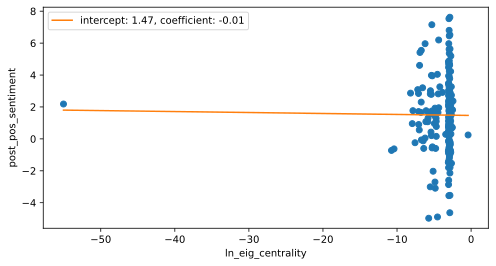

In [21]:
fit_regression_line_intercept(uiuc_regression_avg_df['agg_comment_compound'].values, 
                              uiuc_regression_avg_df['ln_eig_centrality'].values, 'ln_eig_centrality')